In [1]:
import numpy as np
import pandas as pd
import pyodbc
import sqlalchemy
import sqlite3
from subprocess import check_output
import os
from IPython.core.display import Image, display

from sqlalchemy import create_engine
engine = create_engine('sqlite:////...', echo=False)

## 1. What you write is not what SQL sees
#### Reminder: Algebra order of operation.

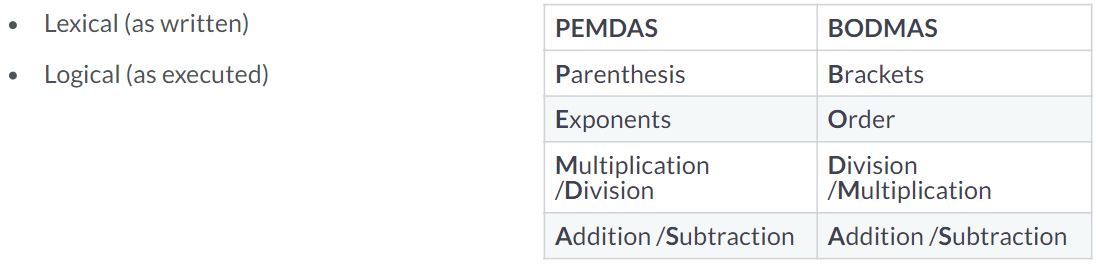

In [2]:
## hidden

#### Examples: `logical` & `hexial`

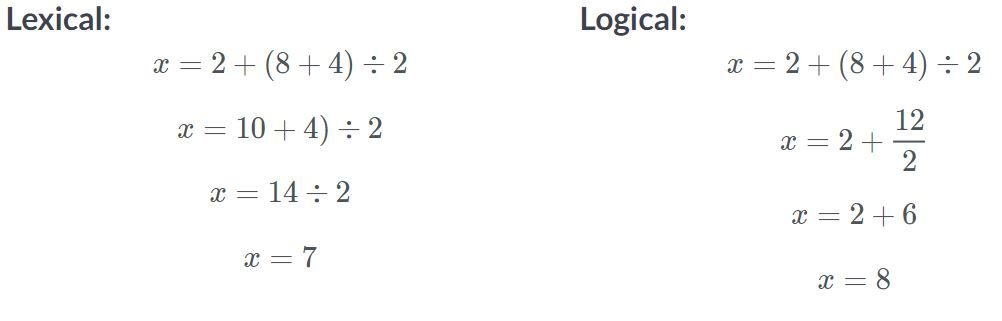

In [3]:
## hidden

#### `SQL` logical order of operations and clause

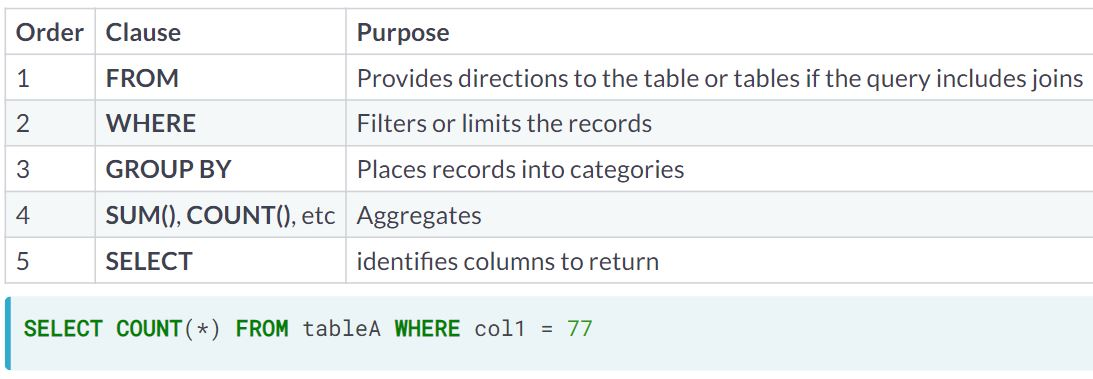

In [4]:
## hidden

#### `GROUP BY` and aggregation.

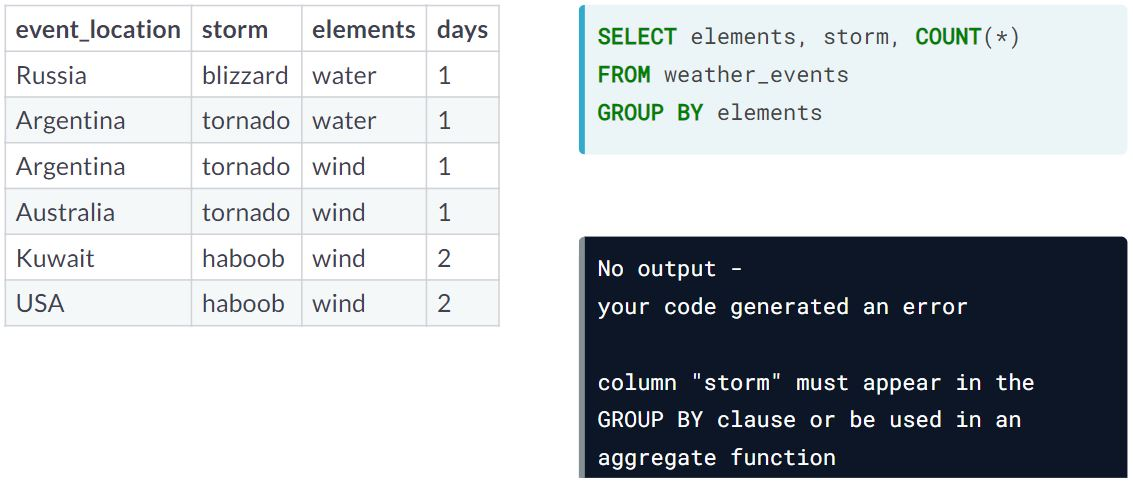

In [5]:
## In the left; is the weather table; while in the right is SQL commands and error message!
## In this case, we can not print all column beside the aggregation function: COUNT

**`aggregation_operators_order`** in **`GROUP BY` [Part1](first_3_clauses)**

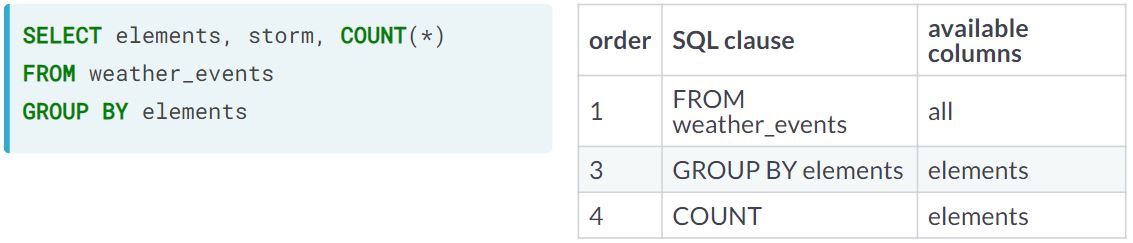

In [6]:
## hidden

**Example.**

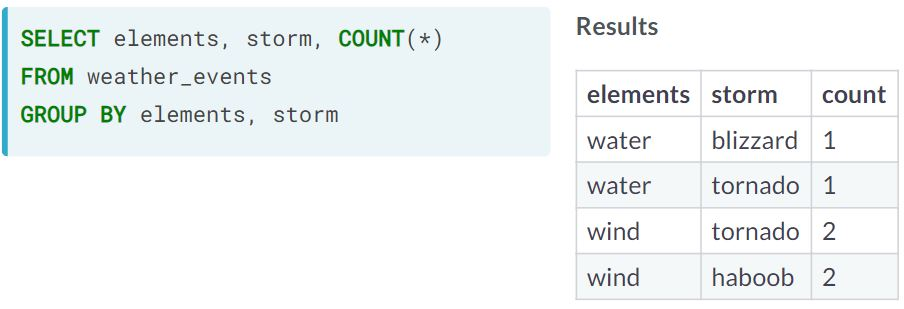

In [7]:
## hidden

**`aggregation_operators_order`** in **`GROUP BY` [Part2](continue_and_end)**

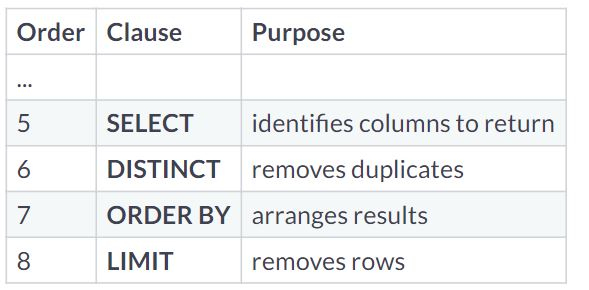

In [8]:
## hidden

### `DISTINCT` & `LIMIT`
#### Example

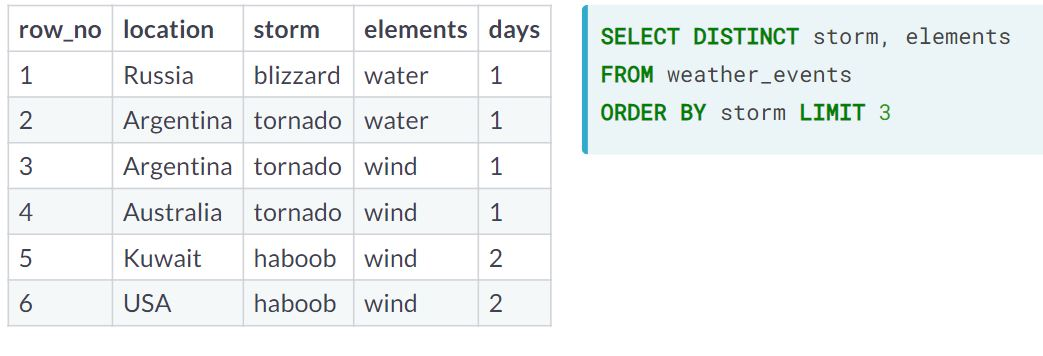

In [9]:
## hidden

**Code explaination.**
- Firstly, the command `FROM weather_events` along with `SELECT DISTINCT storm, elements` returns the **distinct values** so the output has 4 rows are `1, 2, 3, 5` (as in the `available rows` column)
- Next, the `ORDER` clause in `ORDER BY storm` will arrange the `rows` w.r.t the `storm (type)`; hence the output now then is `1, 5, 2, 3`
- Finally, the `LIMIT 3` will returns only the first 3 values after implement the `ORDER` clause; so the final result (`available rows`) will be `1, 5, 2`

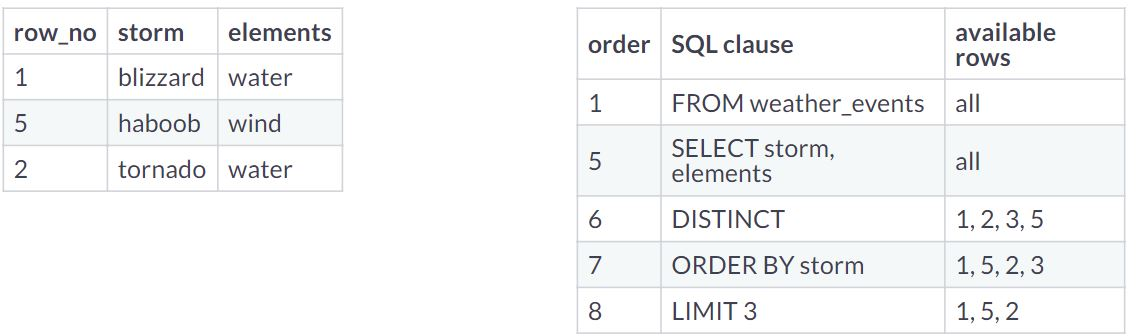

In [10]:
## The left side is the output and the right is used for illustration the explaination.

### Summarization.

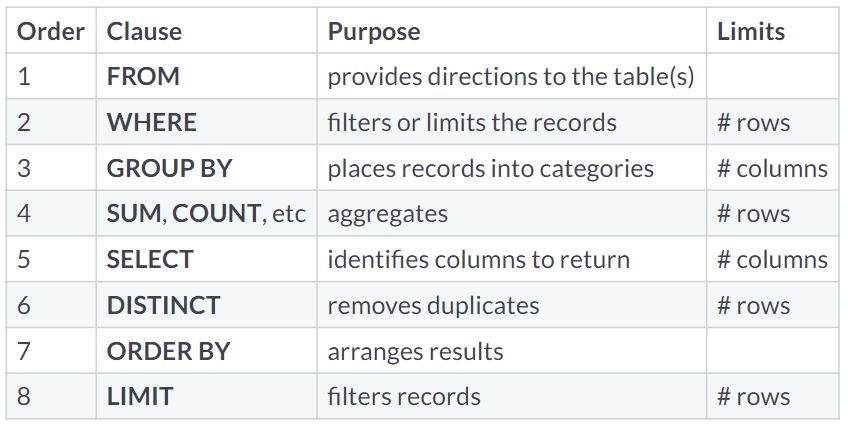

In [11]:
## hidden

### EXERCISEs.
#### Exercise 1.1. Order of operations impact on query structure
The `World Bank` has data on a lot of countries, but they are missing values for some years. You decide to look for countries that have at least one year of missing population data. You write the following query, but it does **NOT** run.

                        SELECT olympic_cc, COUNT(*)
                        FROM demographics
                        WHERE population IS NULL
                        AND COUNT(*) > 1
You reference your notes about the `SQL` order of operations to understand why.

**Question.** Which of the following explains the `logical error`?

A. All countries have population data for each year.

B. The `WHERE` clause cannot be used to filter for nulls.

C. `COUNT()` occurs before the `demographics` table is filtered to the null population.

D. `Aggregations` occur after the `WHERE` clause.

**`Answers & comments`.**

*A. Wrong!!* `Queries` sometimes return no results. This is different than receiving an error, which occurs when the query is not written or structured correctly.

*B. Incorrect!!* The purpose of the `WHERE clause` is to filter data, including filtering for `null` values.

*C. Wrong!!* The `WHERE clause` occurs before `aggregations`, such as `SUM()` or `COUNT()`.

**D. Correct!!!** Since `aggregations` occur after the `WHERE clause` in the `logical order` of operations, the `COUNT(*)` is not `available` in the `WHERE clause.` 

#### Exercise 1.2. Group by and aggregations
You decide to take another look at countries with missing population data. You join the World Bank demographics data to the Olympic oregions data.

You want to look at trends so group countries regionally so see how many countries, by region, are missing population data. You know you want to view the results by Olympic region and count the countries with population data using the country code `olympic_cc`.

Look at the following code then select **`Run Code`** to view the results. Did you get an `error`?

                        SELECT reg.country, COUNT(DISTINCT dem.olympic_cc)
                        FROM regions reg -- Olympics region data
                        LEFT JOIN demographics dem -- World Bank population data
                          ON dem.olympic_cc = reg.olympic_cc
                        GROUP BY reg.region;

Read the red error message then follow the instructions below to correct the `query`.

#### Instructions
- Read the red error output.
- Change the non-aggregated column in the `SELECT clause` to match the `GROUP BY` column .

**SOLUTION.**
- `error:`

                column "reg.country" must appear in the GROUP BY clause or be used in an aggregate function
                LINE 1: SELECT reg.country, COUNT(DISTINCT dem.olympic_cc)
                               ^               
- **`correct!`**     
                
                SELECT reg.region, -- change country into region to use the GROUP BY reg.region 
                       COUNT(DISTINCT dem.olympic_cc)
                FROM regions reg -- Olympics region data
                LEFT JOIN demographics dem -- World Bank population data
                     ON dem.olympic_cc = reg.olympic_cc
                GROUP BY reg.region;
- **`result`.**

region|count
:-|:-:
Africa|54
Asia|49
Australia and Oceania|18
Europe|45
North America|30
South America|12             

- **`Comments`.** The query executes using the logical order: `GROUP BY, COUNT()`, then `SELECT`. The `GROUP BY` must categorize the data into regions in order for the `COUNT()` function to be able to return the count by `region`.

#### Exercise 1.3. Count and count distinct
By pure numbers, the greater a country's population, the greater the pool of athletes and thus Olympians. You decide to look at Olympic medals based purely on population, or volume of available athletes.

The World Bank data shows that in 2016, the countries with the highest populations were `China (1,378,665,000)`, `India (1,324,171,354)`, and the `United States of America (323,405,935)`.

Now you will look at the Olympic athletes' data from the 2016 Summer Olympics to see if China, India, and the USA did indeed win the most medals.

#### Instructions.
**Step 1.** Count the number of `athlete_id` by `country_code`.

**SOLUTION.**

                    SELECT country_code,
                           COUNT(athlete_id) as medals_count
                    FROM athletes_recent
                    WHERE medal IS NOT NULL
                    AND year = 2016
                    GROUP BY country_code
                    ORDER BY medals_count DESC;

**Step 2.** Modify the query to count the unique `athletes`.

                    SELECT country_code,
                           COUNT(DISTINCT athlete_id) as medals_count
                    FROM athletes_recent
                    WHERE medal IS NOT NULL
                    AND year = 2016
                    GROUP BY country_code
                    ORDER BY medals_count DESC;

- **query result**

country_code|medals_count
:-|:-:
USA|211
DEU|150
GBR|130
RUS|103
CHN|100
FRA|93
AUS|71
ITA|69
CAN|62
JPN|57
SCG|54
BRA|48
NED|46
ESP|43
DEN|39
NZL|35
SWE|26
CRO|24
JAM|24
KOR|23
ARG|22
RSA|22
BEL|21
NOR|19
NGR|18
AZE|18
KAZ|18
ROU|16
POL|16
HUN|15
CZE|14
UKR|13
FIJ|13
UZB|13
KEN|12
BLR|12
SUI|11
CUB|11
IRI|8
TUR|8
SVK|8
MAL|8
COL|8
LTU|7
GEO|7
ETH|7
PRK|7
BUL|7
BAH|6
THA|6
GRE|6
TPE|5
MEX|5
ARM|4
EST|4
SLO|4
INA|4
VEN|3
EGY|3
IRL|3
TUN|3
CIV|2
IND|2
BRN|2
IOA|2
AUT|2
MGL|2
ISR|2
VNM|1
BDI|1
DOM|1
FIN|1
GRN|1
JOR|1
KOS|1
MAR|1
NIG|1
PHI|1
POR|1
PUR|1
QAT|1
SIN|1
TJK|1
TTO|1
UAE|1
ALG|1

- **Comment** `COUNT()` aggregated to the country level. The `DISTINCT clause` then removed the athletes from each country winning multiple medals. The top 3 medaled countries were not the 3 most populous `(China, India, and the USA)` but rather the `USA, Germany`, and the `United Kingdom`.

## 2. Filtering in the WHERE clause
### Limit the data.

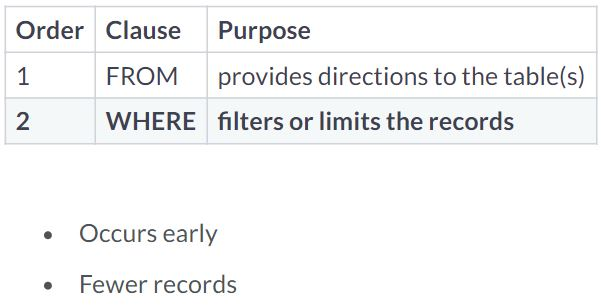

In [12]:
## hidden

### The `EXPLAIN` clause

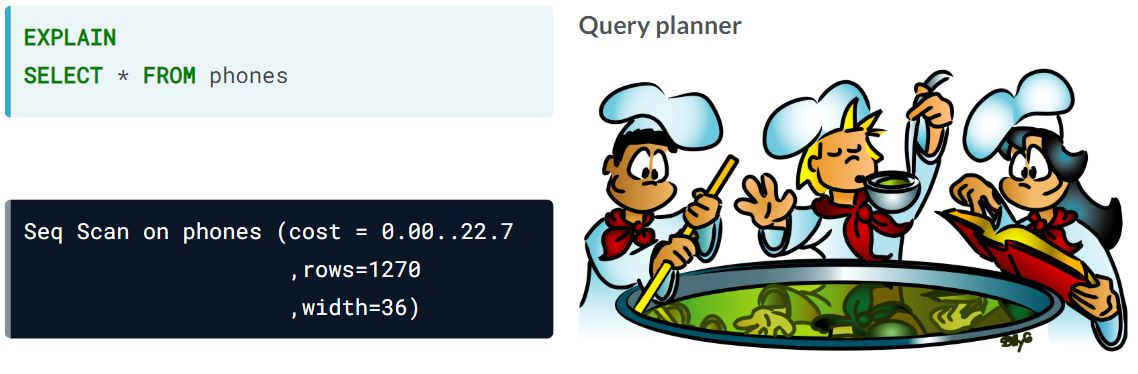

In [13]:
## hidden

### The `EXPLAIN` clause with `WHERE`

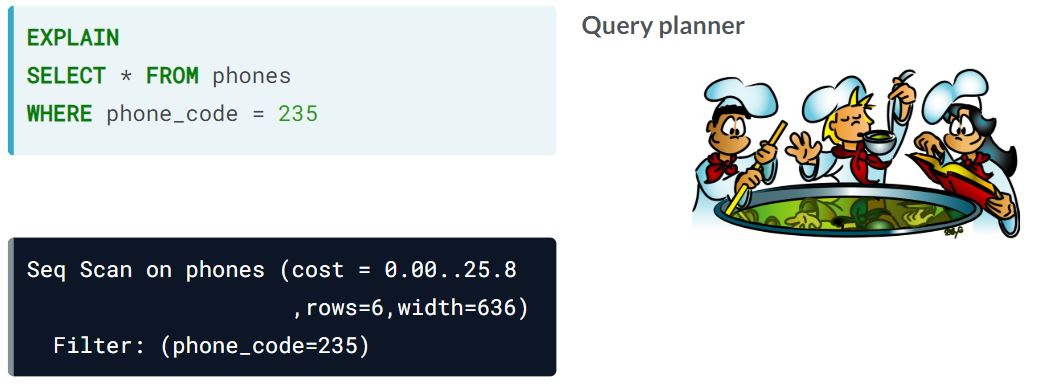

In [14]:
## hidden

### Good-Filtering for the similar values with `LIKE OR`

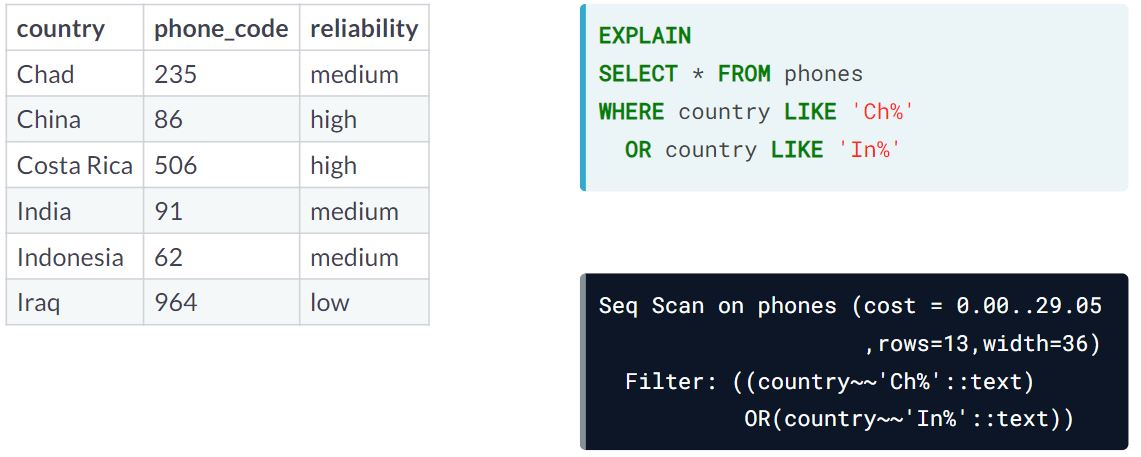

In [15]:
## hidden

### Better-Filtering for the similar values with `LIKE ANY`

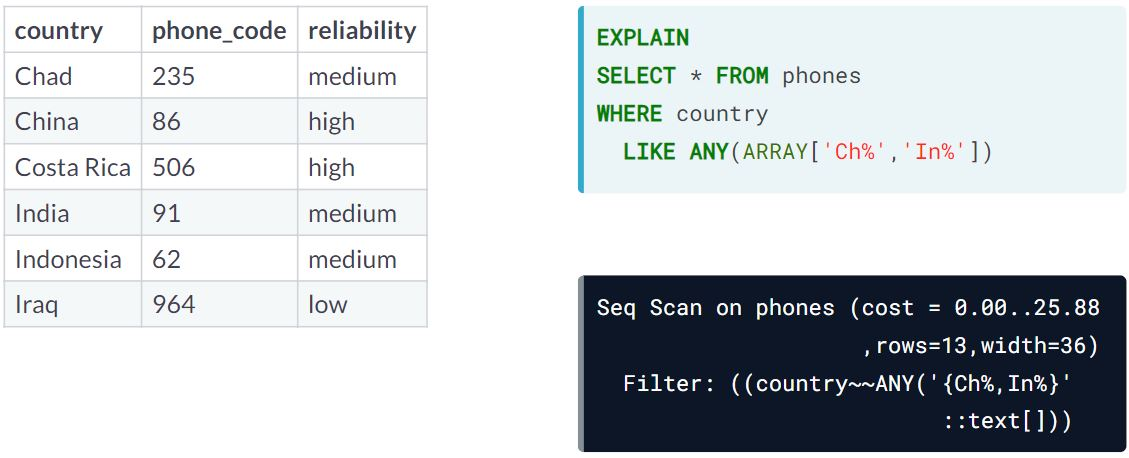

In [16]:
## hidden

### Good-Filtering for exact values with `OR`

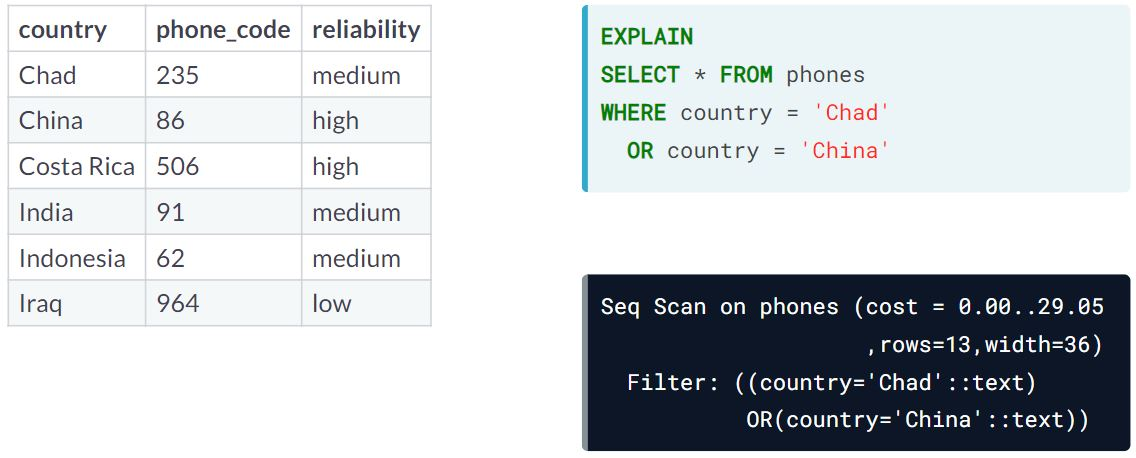

In [17]:
## hidden

### Better-Filtering for exact values with `IN`

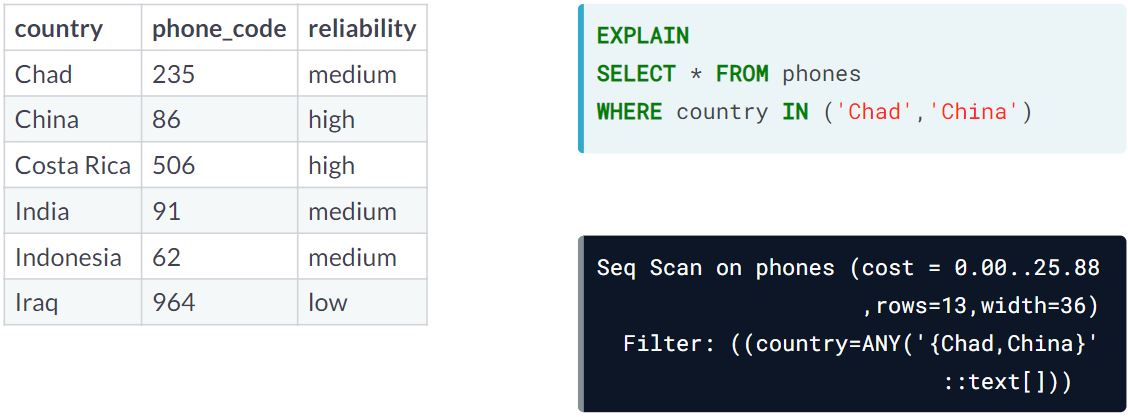

In [18]:
## hidden

### Best-filtering for numbers

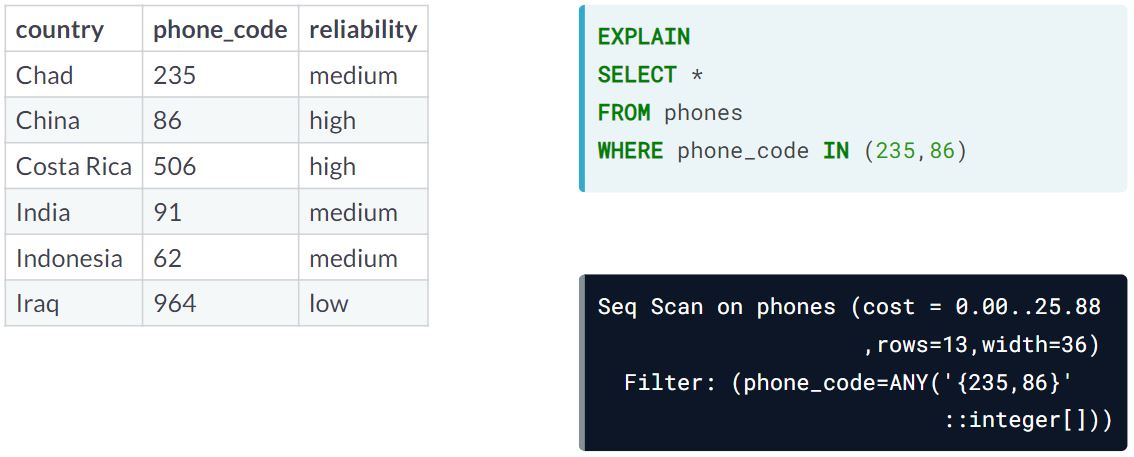

In [19]:
## hidden

### Summarizing the best `WHERE` filters

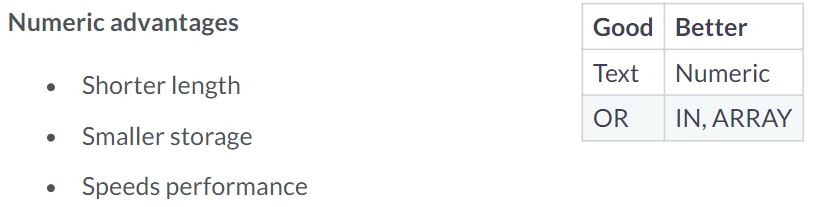

In [20]:
## hidden

### EXERCISEs.
#### Exercise 2.1. `OR` versus `IN` with `athletes` table.
While you are interested in finding the factors that help countries produce Olympians, you want to pause to first look at the athletes. The Olympics has no age restrictions for competitors. The youngest ever Winter competitor was 11-year-old Cecilia Colledge, a figure skating athlete from Great Britain.

Africa also has an 11-year-old figure skating competitor named Marcelle Matthews. Focusing on Africa and the Winter Olympics, find how many young African athletes have competed since the Olympics inception.

#### Instructions
**Step 1.** Use age to find the `preteen` (ages 11 or 12) `athletes`.

**SOLUTION.**

                        SELECT COUNT(*)
                        FROM athletes_wint 
                        WHERE age = 11
                        OR age = 12;

**query result.**

| count |
|:-----:|
| 2 |

**Step 2.** Use a single `WHERE statement` to view the `athletes` of age 11 or 12.

**SOLUTION.**

                        SELECT *
                        FROM athletes_wint 
                        WHERE age IN (11, 12);

**query result.**

id|athlete_id|name|sex|age|height|weight|country_code|region|games|year|season|city|sport|event|medal
:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-
17225|76675|Marcelle Matthews|F|11|null|null|RSA|Africa|1960 Winter|1960|Winter|Squaw Valley|Figure Skating|Figure Skating Mixed Pairs|null
19381|31203|Patricia Anne Eastwood|F|12|null|null|RSA|Africa|1960 Winter|1960|Winter|Squaw Valley|Figure Skating|Figure Skating Womens Singles|null

**Step 3. (expanding problem)** Adding `EXPLAIN` to the 2 preceding steps then compare them!

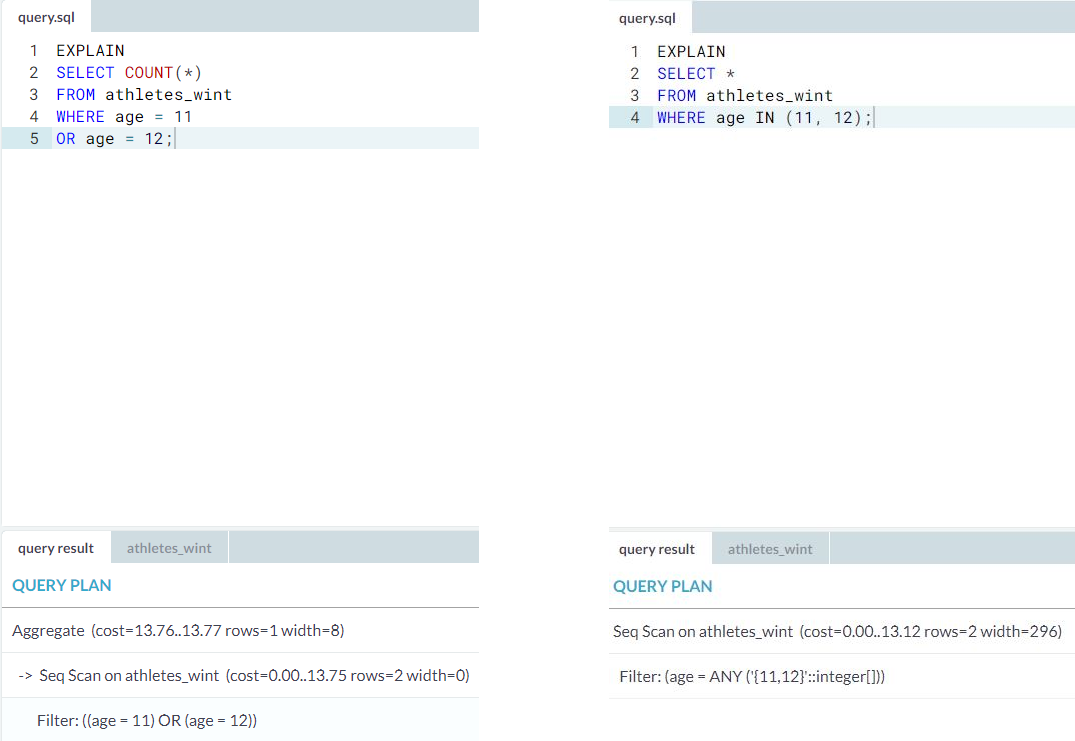

In [21]:
## hidden

#### Exercise 2.2.  Data type filters
Since the first African country participated in the Winter Olympics in 1960, only two preteen (11 and 12 years) athletes have participated. Both athletes competed in the 1960 games.

Perhaps athletes in the 21st century are now older when they compete. Take a quick look at the oldest (1960) Winter games and compare it to the Winter games 50 years later (2010) to test this hypothesis.

#### Instructions.
**Step 1.** Filter the table to the two relevant Winter Olympics, the 1960 Winter and 2010 Winter games .

**SOLUTION.**

                        SELECT games, name, age
                        FROM athletes_wint
                        WHERE year IN (2010, 1960)
                        ORDER BY games;
**query result.**

games|name|age
:-|:-|:-:
1960 Winter|Marcelle Matthews|11
1960 Winter|Marion Sage|16
1960 Winter|Patricia Anne Eastwood|12
1960 Winter|Idris Gwyn Jones|20
2010 Winter|Mehdi Selim Khelifi|17
2010 Winter|Oliver Martin Kraas|34
2010 Winter|Peter Scott|19
2010 Winter|Robel Zemichael Teklemariam|35
2010 Winter|Samir Azzimani|32
2010 Winter|Samir Azzimani|32
2010 Winter|Kwame Nkrumah Acheampong|35
2010 Winter|Leyti Alexander Seck|28
2010 Winter|Leyti Alexander Seck|28

**Step 2.** Optimize that query by changing to the `numeric year` filter.

**SOLUTION.**

                    SELECT games, name, age
                    FROM athletes_wint
                    WHERE year IN (1960.0, 2010.0)
                    ORDER BY games;

- **query result.**

games|name|age
:-|:-|:-:
1960 Winter|Marcelle Matthews|11
1960 Winter|Marion Sage|16
1960 Winter|Patricia Anne Eastwood|12
1960 Winter|Idris Gwyn Jones|20
2010 Winter|Mehdi Selim Khelifi|17
2010 Winter|Oliver Martin Kraas|34
2010 Winter|Peter Scott|19
2010 Winter|Robel Zemichael Teklemariam|35
2010 Winter|Samir Azzimani|32
2010 Winter|Samir Azzimani|32
2010 Winter|Kwame Nkrumah Acheampong|35
2010 Winter|Leyti Alexander Seck|28
2010 Winter|Leyti Alexander Seck|28

- **Comments.** `Numeric IN filter` conditions are the **most efficient** because they are **`small`** and **`operate as one filter step in the query plan`**. Your quickly performing query found that recent competitors do seem older than those in the 1960 Olympics.

#### Exercise 2.3. EXPLAIN the filter query plan step
All Olympic athletes are impressive, but athletes that are not yet adults (i.e., too young to drive or vote) are particularly impressive. You will look at these young athletes, those under 16 years, for African athletes across all Winter Olympics.

Before proceeding, feel free to explore the `athletes_wint` table and find if any `athletes` are your age.

Once done exploring, you will use the `EXPLAIN` function to see how your `WHERE` clause executes.

#### Instructions.
**Step 1.** Use `age` to find all the records with `athletes` less than 16 years old.

**SOLUTION**

                            SELECT *
                            FROM athletes_wint
                            WHERE age < 16;

**query result.**

id|athlete_id|name|sex|age|height|weight|country_code|region|games|year|season|city|sport|event|medal
:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-|:-
16797|50264|Lotfi Housnialaoui|M|15|null|null|MAR|Africa|1988 Winter|1988|Winter|Calgary|Alpine Skiing|Alpine Skiing Mens Giant Slalom|null
16798|50264|Lotfi Housnialaoui|M|15|null|null|MAR|Africa|1988 Winter|1988|Winter|Calgary|Alpine Skiing|Alpine Skiing Mens Slalom|null
17225|76675|Marcelle Matthews|F|11|null|null|RSA|Africa|1960 Winter|1960|Winter|Squaw Valley|Figure Skating|Figure Skating Mixed Pairs|null
19381|31203|Patricia Anne Eastwood|F|12|null|null|RSA|Africa|1960 Winter|1960|Winter|Squaw Valley|Figure Skating|Figure Skating Womens Singles|null

**Step 2. Answer the question.** Look at the query plan to see if the less then operator `(<)` functions like an `OR` or like an `IN` operator in the filter step.

A) It functions similar to an `IN` operator.

B) It functions similar to an `OR` operator.

**Answers & comments.**

**A. Exactly!!!** The `query` plan filter step treated the whole `WHERE clause` as one filter statement, just like the `IN` operator.

*B. Incorrect!!* The `OR` operator results in multiple filter conditions that are executed independently in the query plan.

## 3. Filtering while joining.
### Joins visited.

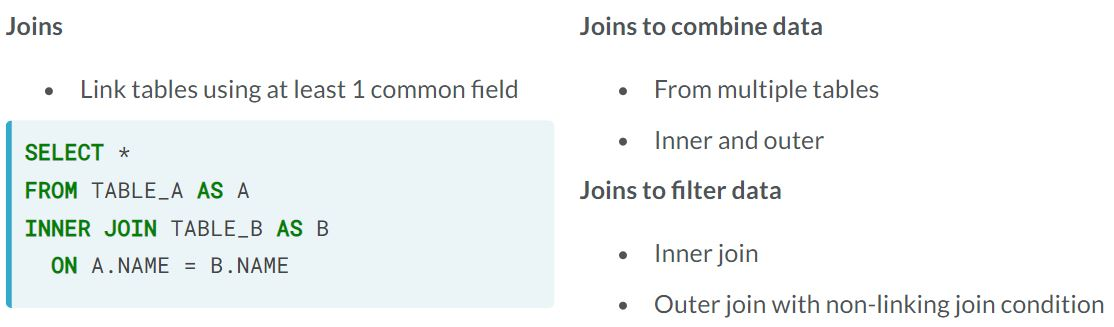

In [22]:
## hidden

#### Patient & appointment data.

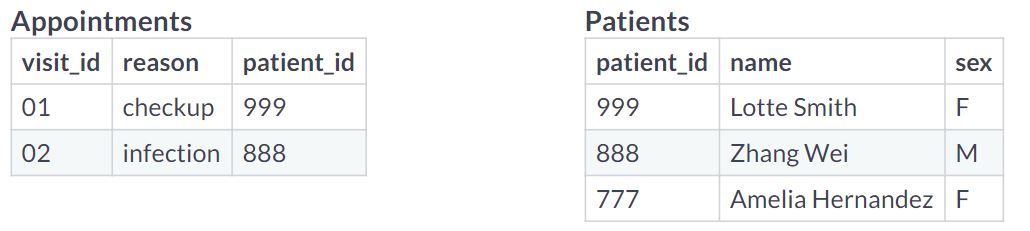

In [23]:
## hidden

### `INNER JOIN` to filter

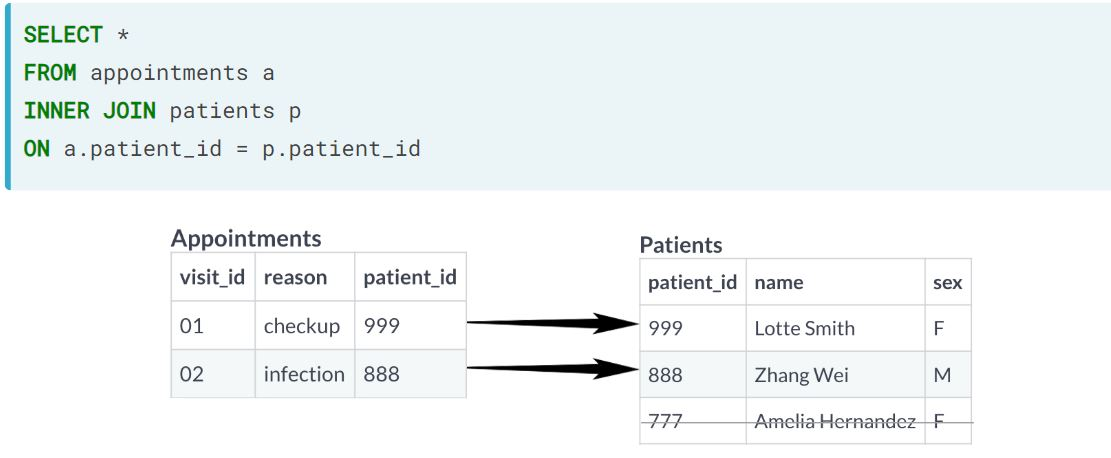

In [24]:
## hidden

**result.**

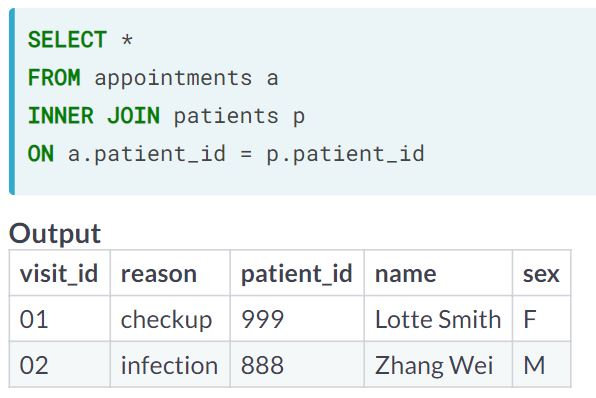

In [25]:
## hidden

### `LEFT (OUTER) JOIN` to filter

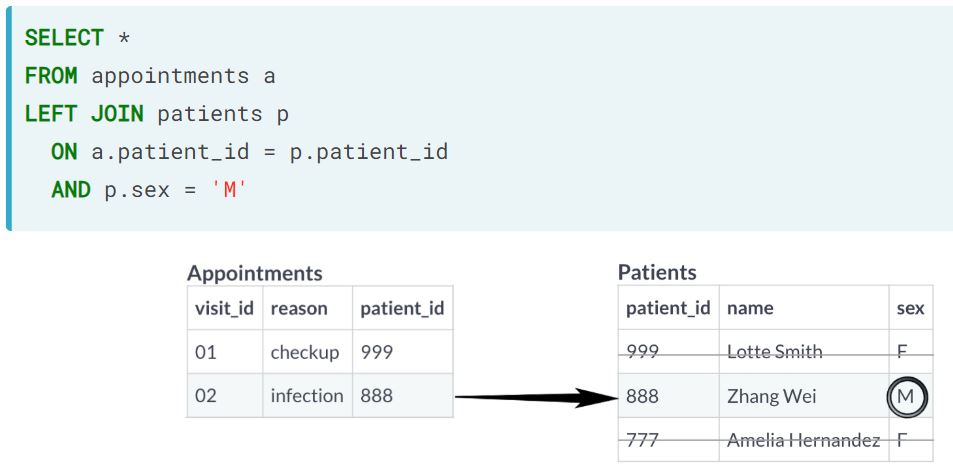

In [26]:
## hidden

**result.**

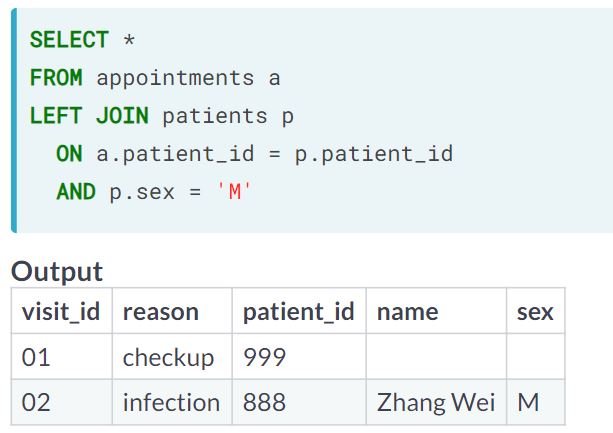

In [27]:
## hidden

### Filter pitfalls

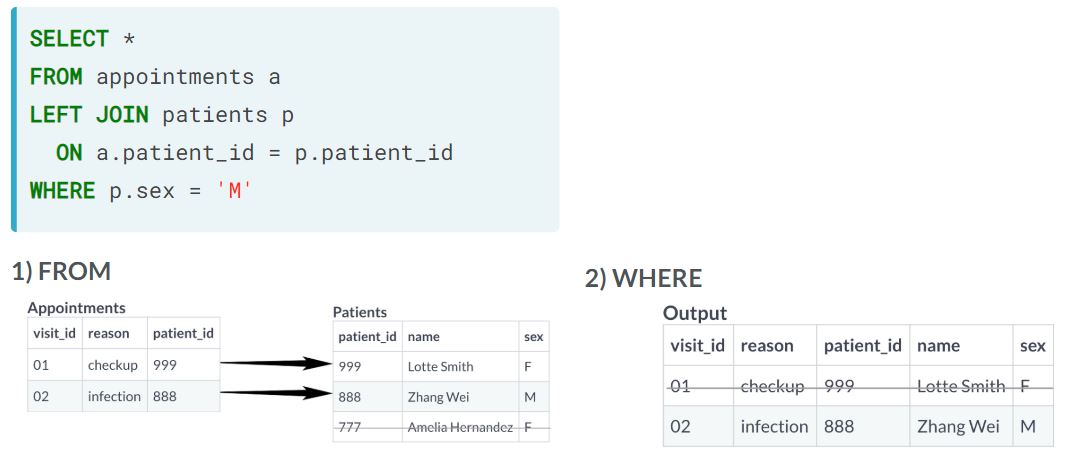

In [28]:
## hidden

### Output comparisions: `filter` inside & outside the `OUTER JOIN`

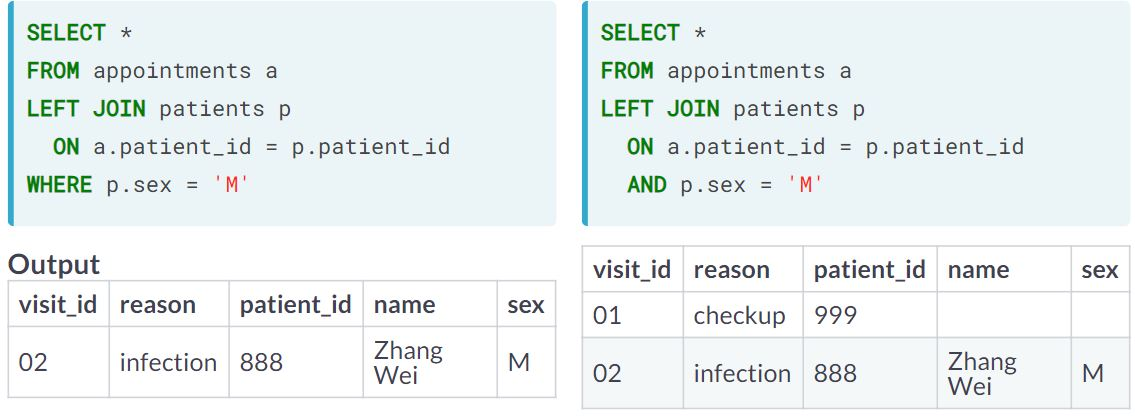

In [29]:
## hidden

### Filter pitfalls improved!
So the left table returns the better result as we expected!

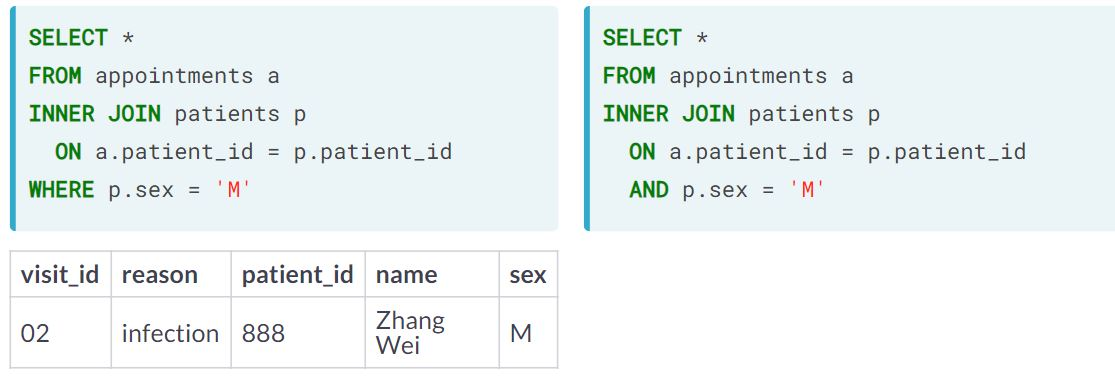

In [30]:
## hidden

### EXERCISEs.
#### Exercise 3.1.  Where to place a region filter
Population alone does not predict the number of Olympians. Researchers propose that gross domestic product (GDP) together with population can predict the number of Olympians. Luckily the World Bank also collects GDP per capita (GDP divided by the number of citizens) on many countries.

Focusing again on `Africa`, the most populous countries in 2014 were `Nigeria`, `Ethiopia`, and `Egypt`; however, the only African countries sending athletes to the 2014 Olympics were `Morocco`, `Togo`, and `Zimbabwe`.

Determine which `African` countries have 2014 GDP data and whether `Morocco, Togo`, and `Zimbabwe` have high GDPs.

#### Instructions 
**Step 1.** Use `region` as a non-linking join condition to find the countries in `Africa`. Note how many records are returned.

**SOLUTION.**

                        SELECT dem.olympic_cc, reg.country, dem.gdp, dem.population
                        FROM demographics dem
                        LEFT JOIN oregions reg
                          ON dem.olympic_cc = reg.olympic_cc
                            AND reg.region = 'Africa'
                        WHERE dem.year = 2014
                        AND dem.gdp IS NOT NULL
                        ORDER BY dem.gdp DESC; 
**result.**

olympic_cc|country|gdp|population
:-|:-|:-:|:-:
MAC|null|137742.79|588781
QAT|null|127318.9|2374419
LUX|null|101640.05|556319
SIN|null|85227.07|5469724
BRU|null|80155.54|411704
...|...|...|...
NIG|Niger|952.79|19148219
LBR|Liberia|847.72|4390737
BDI|Burundi|846.09|9891790
COD|Democratic Republic of Congo|827.32|73722860
CAF|Central African Republic|629.05|4515392


**Step 2.** Move `region` to the `WHERE clause` to remove records, instead of returning null countries for `non-African` records.

**SOLUTION.**

                SELECT dem.olympic_cc, reg.country, dem.gdp, dem.population
                FROM demographics dem
                LEFT JOIN oregions reg
                     ON dem.olympic_cc = reg.olympic_cc
                WHERE dem.year = 2014
                AND reg.region = 'Africa'
                AND dem.gdp IS NOT NULL
                ORDER BY dem.gdp DESC;

**result.**

olympic_cc|country|gdp|population
:-|:-|:-:|:-:
GEQ|Equatorial Guinea|33228.16|1129424
SEY|Seychelles|25515.54|91359
MRI|Mauritius|19231.47|1260934
GAB|Gabon|17569.95|1875713
LBA|Libya|17246.83|6204108
BOT|Botswana|16765.16|2168573
ALG|Algeria|14203.9|39113313
RSA|South Africa|13051.83|54539571
TUN|Tunisia|11342.42|11143908
EGY|Egypt|10407.78|91812566
NAM|Namibia|10131.36|2370992
SWZ|Swaziland|8291.6|1295097
MAR|Morocco|7442.42|34318082
ANG|Angola|6591.54|26920466
CPV|Cape Verde|6245.01|526437
NGR|Nigeria|5975.01|176460502
CGO|Republic of Congo|5834.01|4871101
SUD|Sudan|4403.43|37737913
GHA|Ghana|4075.34|26962563
MTN|Mauritania|3850.73|4063920
ZAM|Zambia|3826.63|15620974
CMR|Cameroon|3367.18|22239904
CIV|Ivory Coast|3217.77|22531350
STP|Sao Tome and Principe|3057.82|191266
KEN|Kenya|2900.37|46024250
LES|Lesotho|2820.27|2145785
TAN|Tanzania|2525.46|52234869
SEN|Senegal|2337.11|14546111
CHA|Chad|2187.63|13569438
BEN|Benin|2108.02|10286712
SSD|South Sudan|2039.33|11530971
ZIM|Zimbabwe|2028.02|15411675
MLI|Mali|1964.84|16962846
GUI|Guinea|1827.44|11805509
SLE|Sierra Leone|1782.57|7079162
UGA|Uganda|1724.77|38833338
RWA|Rwanda|1716.97|11345357
BUR|Burkina Faso|1666.89|17585977
GAM|Gambia|1633.06|1917852
COM|Comoros|1508.62|759385
ETH|Ethiopia|1500.65|97366774
GBS|Guinea Bissau|1472.98|1725744
MAD|Madagascar|1445.34|23589801
TOG|Togo|1385.63|7228915
MAW|Malawi|1148.64|17068838
MOZ|Mozambique|1137.53|27212382
NIG|Niger|952.79|19148219
LBR|Liberia|847.72|4390737
BDI|Burundi|846.09|9891790
COD|Democratic Republic of Congo|827.32|73722860
CAF|Central African Republic|629.05|4515392

**Step 3.** Region is again a `JOIN` condition as in the first query. Limit the `demographics` table records with the `oregions` table.

**SOLUTION.**

                SELECT dem.olympic_cc, reg.country, dem.gdp, dem.population
                FROM demographics dem
                INNER JOIN oregions reg
                    ON dem.olympic_cc = reg.olympic_cc
                    AND reg.region = 'Africa'
                WHERE dem.year = 2014
                AND dem.gdp IS NOT NULL
                ORDER BY dem.gdp DESC;

- **result.**

olympic_cc|country|gdp|population
:-|:-|:-:|:-:
GEQ|Equatorial Guinea|33228.16|1129424
SEY|Seychelles|25515.54|91359
MRI|Mauritius|19231.47|1260934
GAB|Gabon|17569.95|1875713
LBA|Libya|17246.83|6204108
BOT|Botswana|16765.16|2168573
ALG|Algeria|14203.9|39113313
RSA|South Africa|13051.83|54539571
TUN|Tunisia|11342.42|11143908
EGY|Egypt|10407.78|91812566
NAM|Namibia|10131.36|2370992
SWZ|Swaziland|8291.6|1295097
MAR|Morocco|7442.42|34318082
ANG|Angola|6591.54|26920466
CPV|Cape Verde|6245.01|526437
NGR|Nigeria|5975.01|176460502
CGO|Republic of Congo|5834.01|4871101
SUD|Sudan|4403.43|37737913
GHA|Ghana|4075.34|26962563
MTN|Mauritania|3850.73|4063920
ZAM|Zambia|3826.63|15620974
CMR|Cameroon|3367.18|22239904
CIV|Ivory Coast|3217.77|22531350
STP|Sao Tome and Principe|3057.82|191266
KEN|Kenya|2900.37|46024250
LES|Lesotho|2820.27|2145785
TAN|Tanzania|2525.46|52234869
SEN|Senegal|2337.11|14546111
CHA|Chad|2187.63|13569438
BEN|Benin|2108.02|10286712
SSD|South Sudan|2039.33|11530971
ZIM|Zimbabwe|2028.02|15411675
MLI|Mali|1964.84|16962846
GUI|Guinea|1827.44|11805509
SLE|Sierra Leone|1782.57|7079162
UGA|Uganda|1724.77|38833338
RWA|Rwanda|1716.97|11345357
BUR|Burkina Faso|1666.89|17585977
GAM|Gambia|1633.06|1917852
COM|Comoros|1508.62|759385
ETH|Ethiopia|1500.65|97366774
GBS|Guinea Bissau|1472.98|1725744
MAD|Madagascar|1445.34|23589801
TOG|Togo|1385.63|7228915
MAW|Malawi|1148.64|17068838
MOZ|Mozambique|1137.53|27212382
NIG|Niger|952.79|19148219
LBR|Liberia|847.72|4390737
BDI|Burundi|846.09|9891790
COD|Democratic Republic of Congo|827.32|73722860
CAF|Central African Republic|629.05|4515392

- **comments** Placing the region filter in the `WHERE clause` turned the query into an `INNER JOIN`, which reduced the record count, and improved readability. The `GDP` and `population` relationship to `Olympic athletes` is not clear from these results. It is going to take some more exploration.

#### Exercise 3.2. Filtering in the join, where, and select
Looking at all the countries with gross domestic product (GDP) data in 2014, the average GDP per capita was $19,342. For African countries, the average GDP per capita was `$5,879`.

Perhaps the African countries that sent athletes to the Olympics (Morocco, Togo, Zimbabwe) did not have the highest GDPs per capita in Africa but had higher GDPs than the average African GDP.

Test this theory. Find the per capita `GDP` for the African countries with athletes at the 2014 Winter Games.

#### Instructions
- The athletes' data is already limited to African competitors. Find the **unique athletes** from the `athletes_wint` table.
- Use the `JOIN` to filter the `athletes` to only those with odemographic (GDP) data.
- Use a year filter from the `athletes_wint` table to restrict results to only the 2014 athletes.

**SOLUTION.**

                    SELECT DISTINCT ath.name, dem.country, dem.gdp
                    FROM athletes_wint ath
                    LEFT JOIN odemographics dem
                      ON ath.country_code = dem.olympic_cc 
                    WHERE ath.year = 2014
                    ORDER BY dem.gdp DESC;

- **result.**

name|country|gdp
:-|:-|:-:
Adam Lamhamedi|Morocco|7442.42
Kenza Tazi|Morocco|7442.42
Luke Henri Steyn|Zimbabwe|2028.02
Alessia Afi Dipol|Togo|1385.63
Mathilde Amivi Petitjean|Togo|1385.63

- **Comments.** Using an `INNER JOIN` returned only `athletes` with country information in the `demographics` table. Writing the year filter in the `WHERE clause` clearly showed that year came from the `athletes_wint` table. The `query results` show that two athletes came from countries with a GDP higher than the average African GDP and two athletes came from countries with a lower than average African GDP.

## 4. Aggregating with different data `granularities`
### Data `granularity` - level of detail.
- The `level of detail` can come form one or more than one columns; and each `row` of the table is **`unique`**.
- Imagine that the database is describing a `video_games`; one table has an entry for each *video game*.
> Game is a `level of detail`
> A `specific game name` is a columns described the **`unique record`**
> Since, each game has a `unique id`; the `id` column also describe a `unique record`.
- Another table: `game_platforms` let the `platform` for each game; its cells such as `FCDS, GameCube, Wii` hence the `game` and `platform` columns are desribed the `unique` rows

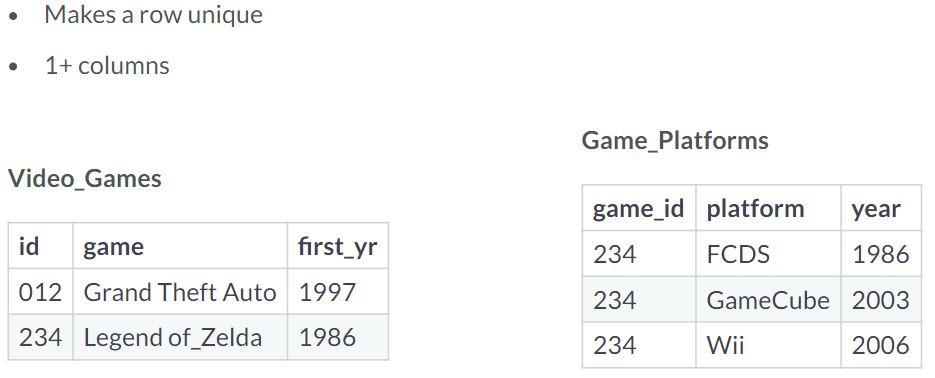

In [31]:
## hidden

### Joining with different `granularities`
In this join, the data is duplicated 3 times

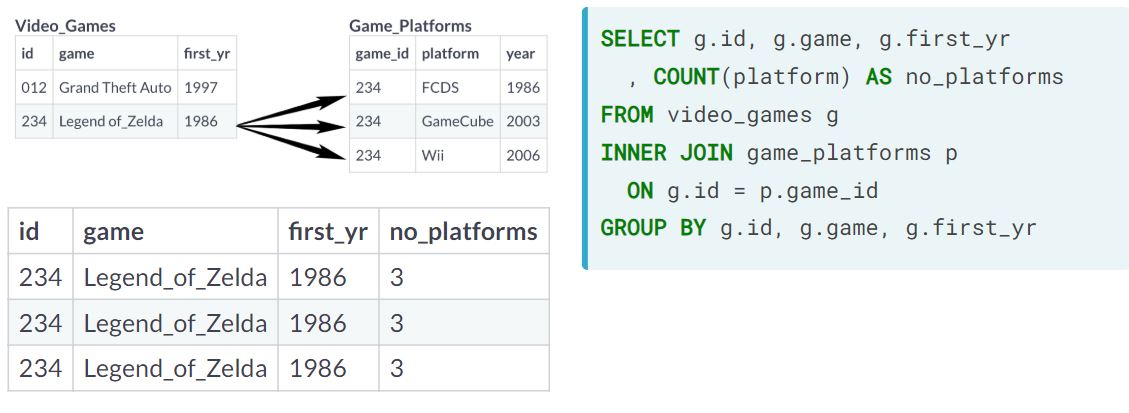

In [32]:
## hidden

### Changing the table `granualarities`

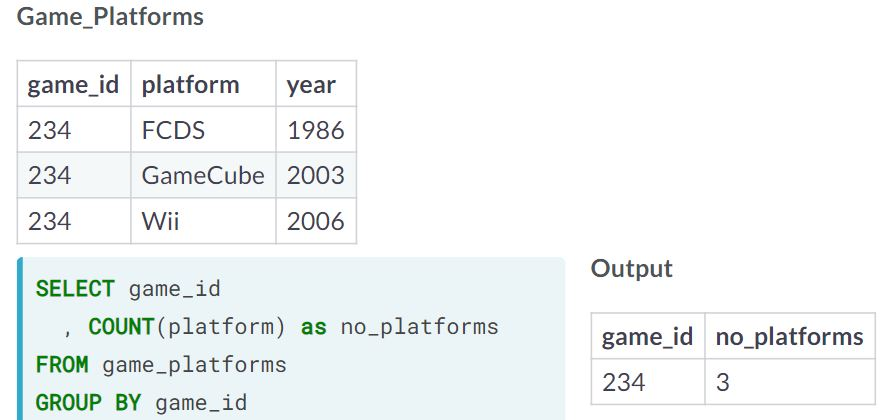

In [33]:
## hidden

### `CTEs` visited.

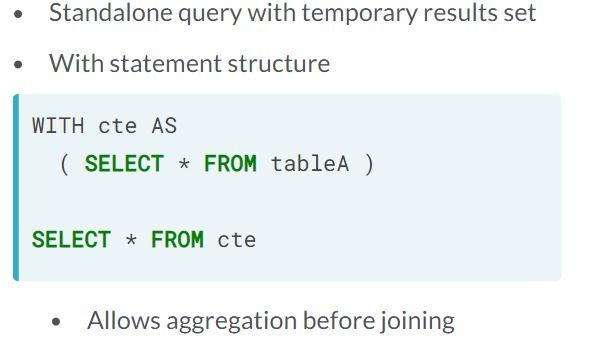

In [34]:
## hidden

### `CTEs` to the granularity rescue.

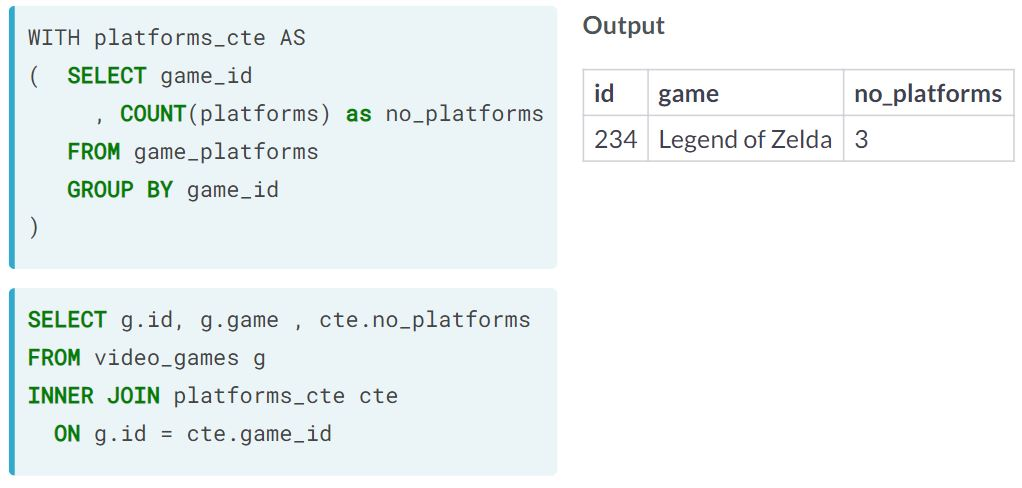

In [35]:
## hidden

### Matching data `granularity` when joining.
- No repeats or duplicates
- Minimum needed results.
- No double counting.

### EXERCISEs
#### Exercise 4.1. Aggregate before joining tables
You have a list of the following items:
- African athletes participating in past Olympics
- Country GDP per capita
- Population by year

For simplification, the `annual demographics` (GDP and population) have been grouped into `low, medium, and high categories`. Your job is to compare each African country's GDP, population, and athlete count.

You want the final answer to have one row per country, per year. Because the `athletes` table is on a different grain (athlete-event) than the `demographics_rank` table (country-year), you will first aggregate the `athletes` table before joining it to the GDP and population data.

#### Instructions
**Step 1.** Count the number of `athletes` by `country` and `year` using the `athlete_id` column.

**SOLUTION.**

                        -- Count the number of athletes by country
                        SELECT country_code, year,
                               COUNT(athlete_id) AS no_athletes
                        FROM athletes
                        GROUP BY year, country_code
                        ORDER BY country_code, year;

**query result**

country_code|year|no_athletes
:-|:-:|:-:
ALG|1964|7
ALG|1968|9
ALG|1972|7
ALG|1980|63
ALG|1984|33
ALG|1988|45
ALG|1992|52
ALG|1996|47
ALG|2000|51
ALG|2004|71
...|...|...|
ZIM|1928|2
ZIM|1960|22
ZIM|1964|33
ZIM|1980|52
ZIM|1984|20
ZIM|1988|47
ZIM|1992|28
ZIM|1996|21
ZIM|2000|26
ZIM|2004|14

**Step 2.** You want the final answer to have one row per `country`, per `year`. A `CTE` converting the `athletes` data from an `athlete-event` grain to a `country-year` grain is loaded. Join it to the `demographics_rank` using `olympic_cc` and `year`.

**SOLUTION.**

                    -- Number of competing athletes
                    WITH athletes AS(
                                  SELECT country_code, year, COUNT(athlete_id) AS no_athletes
                                  FROM athletes
                                  GROUP BY country_code, year
                                )
                    SELECT demos.country, ath.year, ath.no_athletes, 
                          demos.gdp_rank, demos.population_rank
                    FROM athletes ath
                    INNER JOIN demographics_rank demos  
                      ON ath.country_code = demos.olympic_cc -- Country
                      AND ath.year = demos.year -- Year
                    ORDER BY ath.no_athletes DESC;

- **query result.**

country|year|no_athletes|gdp_rank|population_rank
:-|:-:|:-:|:-|:-
South Africa|2008|179|High|High
South Africa|2000|161|High|High
South Africa|2016|155|High|High
South Africa|2012|145|High|High
South Africa|1992|141|High|High
Egypt|2016|137|High|High
Egypt|2012|132|High|High
South Africa|2004|128|High|High
Egypt|2008|116|High|High
South Africa|1996|111|High|High
...|...|...|...|...
Cape Verde|2000|2|Medium|Low
Sao Tome and Principe|1996|2|High|Low
Ethiopia|2010|2|Low|High
Chad|2012|2|Medium|Medium
Ghana|2010|2|Medium|High
Liberia|2004|2|Low|Low
Sierra Leone|2012|2|Low|Medium
Mauritania|2012|2|Medium|Low
Equatorial Guinea|2016|1|High|Low
Chad|2004|1|Low|Medium

- **Comments** Changing the level of detail to `country-year` for each table before joining them is a good optimization trick.

#### Exercise 4.2. South African trends
You decide to zero in on one country to look at country demographic trends over time. Since 1990 (the first year of demographics' data), South Africa's population has increased from 37.5 to 56.7 million people. The GDP per capita has also increased from `$6,267` to `$13,497`.

You want to determine if the number of Olympic athletes from South Africa has increased during this time.

The `athletes` table is at an athlete-event level grain. You aggregate it to the year-country grain before joining it to the `demographics_rank` table. Additionally, the `demographics_rank` table is large, so you want to filter it to only South Africa before joining it to the `athletes` data.

#### Instructions
**Step 1.** 
- Count the number of `athletes` (`athlete_id`) by `year` for South Africa (RSA).
- Include the `season` since `South Africa` has more Summer Olympic athletes than `Winter Olympic athletes`.

**SOLUTION.**

                        SELECT year, season,
                               COUNT(DISTINCT athlete_id) AS no_athletes
                        FROM athletes
                        WHERE country_code = 'RSA'
                        GROUP BY year, season;

**query result.**

year|season|no_athletes
:-:|:-|:-:
1904|Summer|8
1908|Summer|14
1912|Summer|21
1920|Summer|39
1924|Summer|30
1928|Summer|24
1932|Summer|12
1936|Summer|32
1948|Summer|35
1952|Summer|64
1956|Summer|50
1960|Summer|55
1960|Winter|4
1992|Summer|93
1994|Winter|2
1996|Summer|84
1998|Winter|2
2000|Summer|127
2002|Winter|1
2004|Summer|106
2006|Winter|3
2008|Summer|134
2010|Winter|2
2012|Summer|124
2016|Summer|135

**Step 2.** 
- A `query` that counts the unique South African Olympians for each year and season has been loaded. Add the `SQL` needed to turn it into a `CTE` named `athletes_cte`.
- Filter the demographics_rank to `South Africa` using the `olympic_cc` field.

**SOLUTION.**

                    -- South African athletes by year
                    WITH athletes_cte AS (
                                        SELECT year, season,
                                               COUNT(DISTINCT athlete_id) AS no_athletes
                                        FROM athletes
                                        WHERE country_code = 'RSA' -- South Africa filter
                                        GROUP BY year, season
                                    )

                    SELECT ath.year, ath.season, ath.no_athletes, 
                           demos.gdp_rounded, demos.gdp_rank, 
                           demos.population_rounded, demos.population_rank
                    FROM athletes_cte ath
                    INNER JOIN demographics_rank demos
                      ON ath.year = demos.year
                      AND demos.olympic_cc = 'RSA' -- Filter to South Africa
                    ORDER BY ath.season, ath.year;
- **query result.**

year|season|no_athletes|gdp_rounded|gdp_rank|population_rounded|population_rank
:-|:-|:-:|:-:|:-:|:-:|:-
1992|Summer|93|6000|High|39000000|High
1996|Summer|84|6000|High|42000000|High
2000|Summer|127|7000|High|45000000|High
2004|Summer|106|8000|High|48000000|High
2008|Summer|134|11000|High|50000000|High
2012|Summer|124|12000|High|52000000|High
2016|Summer|135|13000|High|56000000|High
1994|Winter|2|6000|High|41000000|High
1998|Winter|2|7000|High|44000000|High
2002|Winter|1|8000|High|47000000|High
2006|Winter|3|10000|High|49000000|High
2010|Winter|2|11000|High|51000000|High            

- **Comments.** `Aggregating` the `athlete`s' data and filtering the `demographics` data were both good methods of optimizing your query. `South Africa's athlete` count has indeed increased with `GDP` and `population` in recent years, a trend most easily seen when looking at the `Summer Olympics`.